<a href="https://colab.research.google.com/github/Yellammabheemichettty/Stock-Time-Series-Analysis/blob/main/stock_time_series_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
import matplotlib.pyplot as plt
from pandas import DataFrame

In [ ]:
#Reaidng the data from csv file
df = pd.read_csv("/content/all_stocks_2017-01-01_to_2018-01-01.csv")

In [ ]:
df.head()

,Date,Open,High,Low,Close,Volume,Name
0,2017-01-03,178.83,180.00,177.22,178.05,2510055,MMM
1,2017-01-04,178.03,178.90,177.61,178.32,1541985,MMM
2,2017-01-05,178.26,179.14,176.89,177.71,1447848,MMM
3,2017-01-06,177.29,178.60,175.80,178.23,1625049,MMM
4,2017-01-09,178.37,178.38,177.20,177.27,1622625,MMM


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7781 entries, 0 to 7780
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    7781 non-null   object 
 1   Open    7757 non-null   float64
 2   High    7772 non-null   float64
 3   Low     7762 non-null   float64
 4   Close   7781 non-null   float64
 5   Volume  7781 non-null   int64  
 6   Name    7781 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 425.6+ KB


In [ ]:
df.describe()

,Open,High,Low,Close,Volume
count,7757.000000,7772.000000,7762.000000,7781.000000,7.781000e+03
mean,160.105484,161.006810,159.015224,159.996171,1.023779e+07
std,217.530884,218.727637,215.859901,217.242145,1.283528e+07
min,17.270000,17.400000,17.250000,17.360000,8.708300e+04
25%,60.430000,61.007500,59.977500,60.420000,3.132760e+06
50%,102.000000,102.835000,101.330000,102.200000,6.083340e+06
75%,154.700000,155.452500,153.775000,154.750000,1.336894e+07
max,1204.880000,1213.410000,1191.150000,1195.830000,3.125568e+08


In [ ]:
#Choosing cloumn from dataset and loading it in df1
df1 = df['Close']

In [ ]:
df1

0       178.05
1       178.32
2       177.71
3       178.23
4       177.27
         ...  
7776     71.58
7777     69.86
7778     70.06
7779     69.82
7780     69.85
Name: Close, Length: 7781, dtype: float64

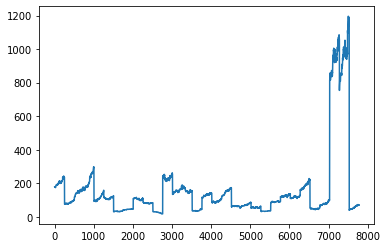

In [ ]:
plt.plot(df1)

In [ ]:
#scaling the data and transform
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
df1.shape

(7781, 1)

In [ ]:
# split into train and test sets
train_size = int(len(df1) * 0.67)
test_size = len(df1) - train_size
train, test = df1[0:train_size,:], df1[train_size:len(df1),:]


In [ ]:
train_size,test_size

(5213, 2568)

In [ ]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
import numpy
time_step = 100
trainX, trainY = create_dataset(train, time_step)
testX, testY = create_dataset(test, time_step)

In [ ]:
print(trainX.shape)
print(trainY.shape)

(5112, 100)
(5112,)


In [ ]:
print(testX.shape)
print(testY.shape)

(2467, 100)
(2467,)


In [ ]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))

In [ ]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
5112/5112 - 59s - loss: 1.0708e-04
Epoch 2/100
5112/5112 - 57s - loss: 7.0790e-05
Epoch 3/100
5112/5112 - 57s - loss: 5.6502e-05
Epoch 4/100
5112/5112 - 57s - loss: 4.8399e-05
Epoch 5/100
5112/5112 - 57s - loss: 4.2007e-05
Epoch 6/100
5112/5112 - 58s - loss: 3.8948e-05
Epoch 7/100
5112/5112 - 57s - loss: 3.5870e-05
Epoch 8/100
5112/5112 - 57s - loss: 3.5453e-05
Epoch 9/100
5112/5112 - 57s - loss: 3.4195e-05
Epoch 10/100
5112/5112 - 57s - loss: 3.3955e-05
Epoch 11/100
5112/5112 - 59s - loss: 3.3050e-05
Epoch 12/100
5112/5112 - 57s - loss: 3.2865e-05
Epoch 13/100
5112/5112 - 57s - loss: 3.2752e-05
Epoch 14/100
5112/5112 - 57s - loss: 3.1886e-05
Epoch 15/100
5112/5112 - 57s - loss: 3.2347e-05
Epoch 16/100
5112/5112 - 58s - loss: 3.2911e-05
Epoch 17/100
5112/5112 - 58s - loss: 3.2701e-05
Epoch 18/100
5112/5112 - 58s - loss: 3.1969e-05
Epoch 19/100
5112/5112 - 58s - loss: 3.1898e-05
Epoch 20/100
5112/5112 - 58s - loss: 3.2498e-05
Epoch 21/100
5112/5112 - 58s - loss: 3.1381e-05
E

In [ ]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)


In [ ]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [ ]:
from sklearn.metrics import mean_squared_error
import math

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 6.58 RMSE
Test Score: 73.76 RMSE


In [ ]:
# shift train predictions for plotting
look_back = 100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict


In [ ]:
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(df1)-1, :] = testPredict

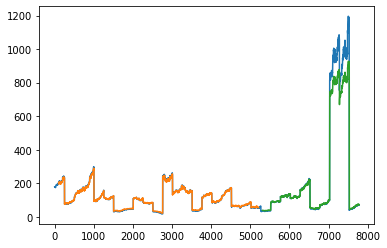

In [ ]:
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
len(test)

2568

In [ ]:

x_input=test[2468:].reshape(1,-1)
x_input.shape

(1, 100)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.04646016]
101
1 day input [0.03451085 0.03441751 0.03522364 0.03617402 0.03673407 0.03804934
 0.03878758 0.03923732 0.04078169 0.04112111 0.04084958 0.0400095
 0.03917792 0.03887244 0.03971251 0.03964462 0.03961917 0.03945794
 0.03899972 0.03959371 0.03922035 0.0405441  0.04073078 0.04171511
 0.04134174 0.04162176 0.04221575 0.04248729 0.04205453 0.0417745
 0.04241092 0.04039135 0.03995859 0.04110414 0.04091746 0.04147751
 0.04170662 0.04280974 0.04268246 0.04273337 0.04284369 0.0435989
 0.04376013 0.04400621 0.0428946  0.04256366 0.04300491 0.04193573
 0.04279277 0.04250426 0.04255518 0.04170662 0.04179148 0.04076472
 0.04090898 0.04256366 0.04370073 0.04476991 0.04516874 0.04510085
 0.04486325 0.04611912 0.04655189 0.04565241 0.04482931 0.04513479
 0.0448972  0.04426078 0.04418441 0.0453045  0.04553362 0.04632277
 0.04708648 0.04687434 0.04715436 0.0464246  0.04634823 0.04497357
 0.044719   0.04475294 0.04323402 0.04308128 0.04416744 0.04485477
 0.04572878 0.04596638 0.04447292 0.

In [ ]:

day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [ ]:
len(df1)

7781

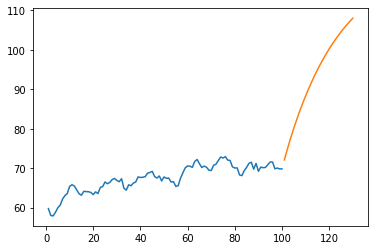

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df1[7681:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

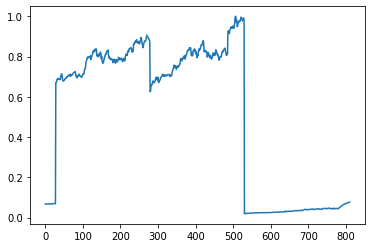

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[7000:])